importing the libraries and PCA & filers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.signal import savgol_filter

After importing we extract the spectra X, the reference values of the total organic carbon y_toc, and the wavelengths.

In [3]:
raw = pd.read_excel("File_S1.xlsx")

X = raw.values[1:,13:].astype('float32')
y_toc = raw.values[1:,1]

wl = np.linspace(400,2500, num=X.shape[1], endpoint=True)

Now we take the second derivative, and run a PCA algorithm to extract the first five principal components.

In [4]:
X2 = savgol_filter(X, 11, polyorder = 2,deriv=2)
pca = PCA(n_components=5)
Xs = StandardScaler().fit_transform(X2)
Xpca = pca.fit_transform(Xs)

To produce a correlogram, Seaborn requires us to put the data into a Pandas dataframe, which will be directly interpreted to build a matrix of correlation plots between any two of the elements of the dataframe.

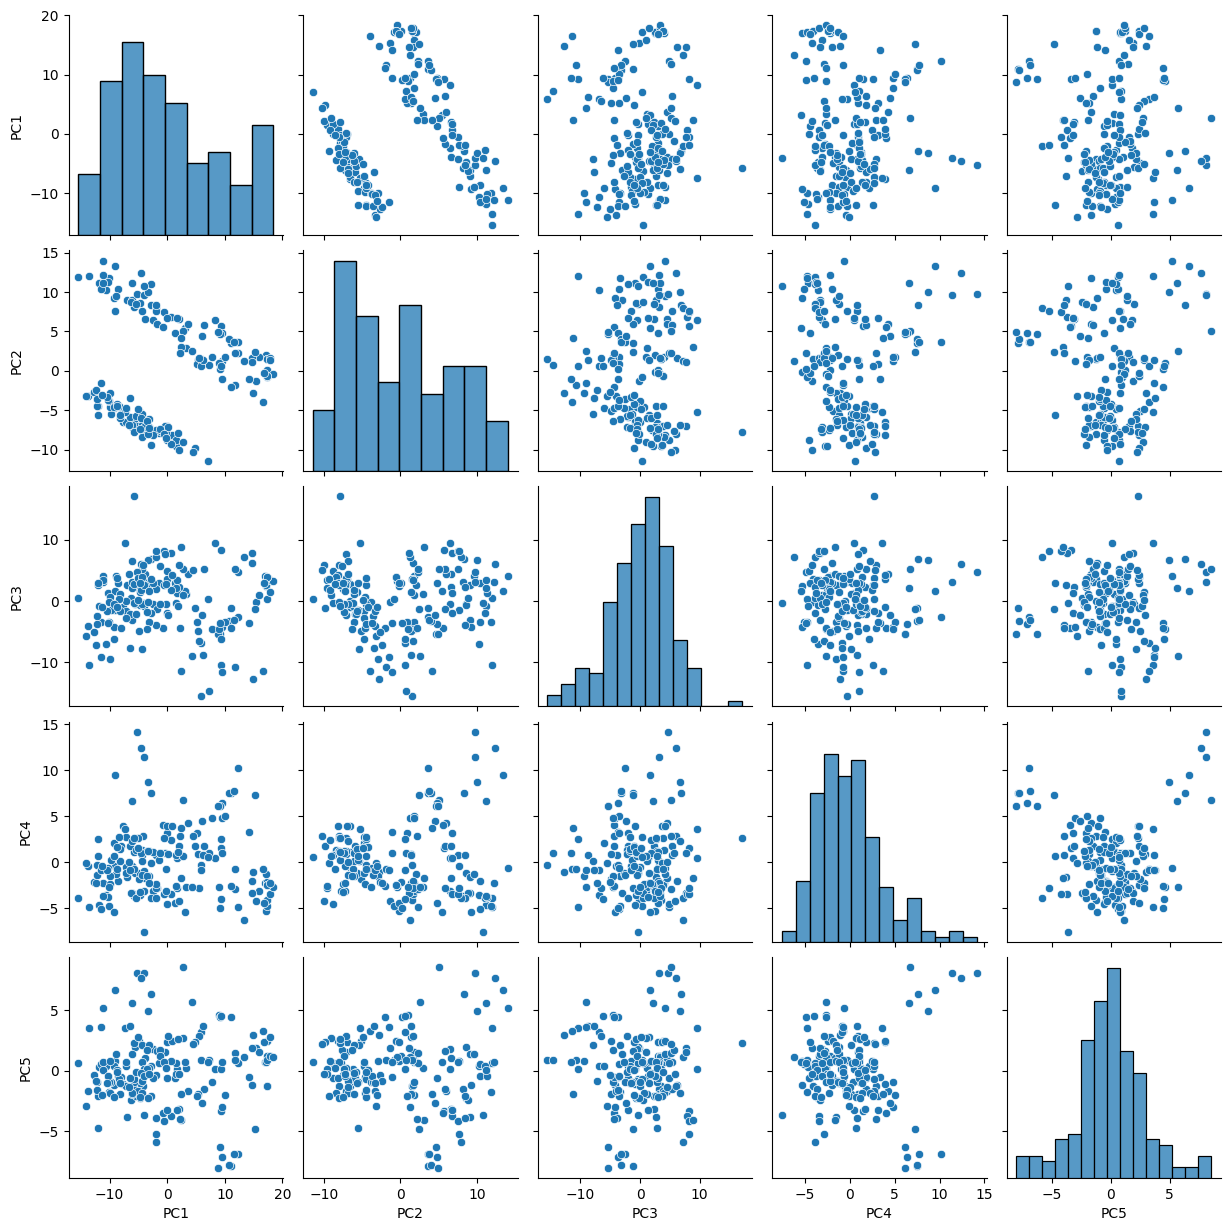

In [5]:
df = pd.DataFrame(Xpca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
sns.pairplot(df)
plt.show()

spot potential trends in the data.

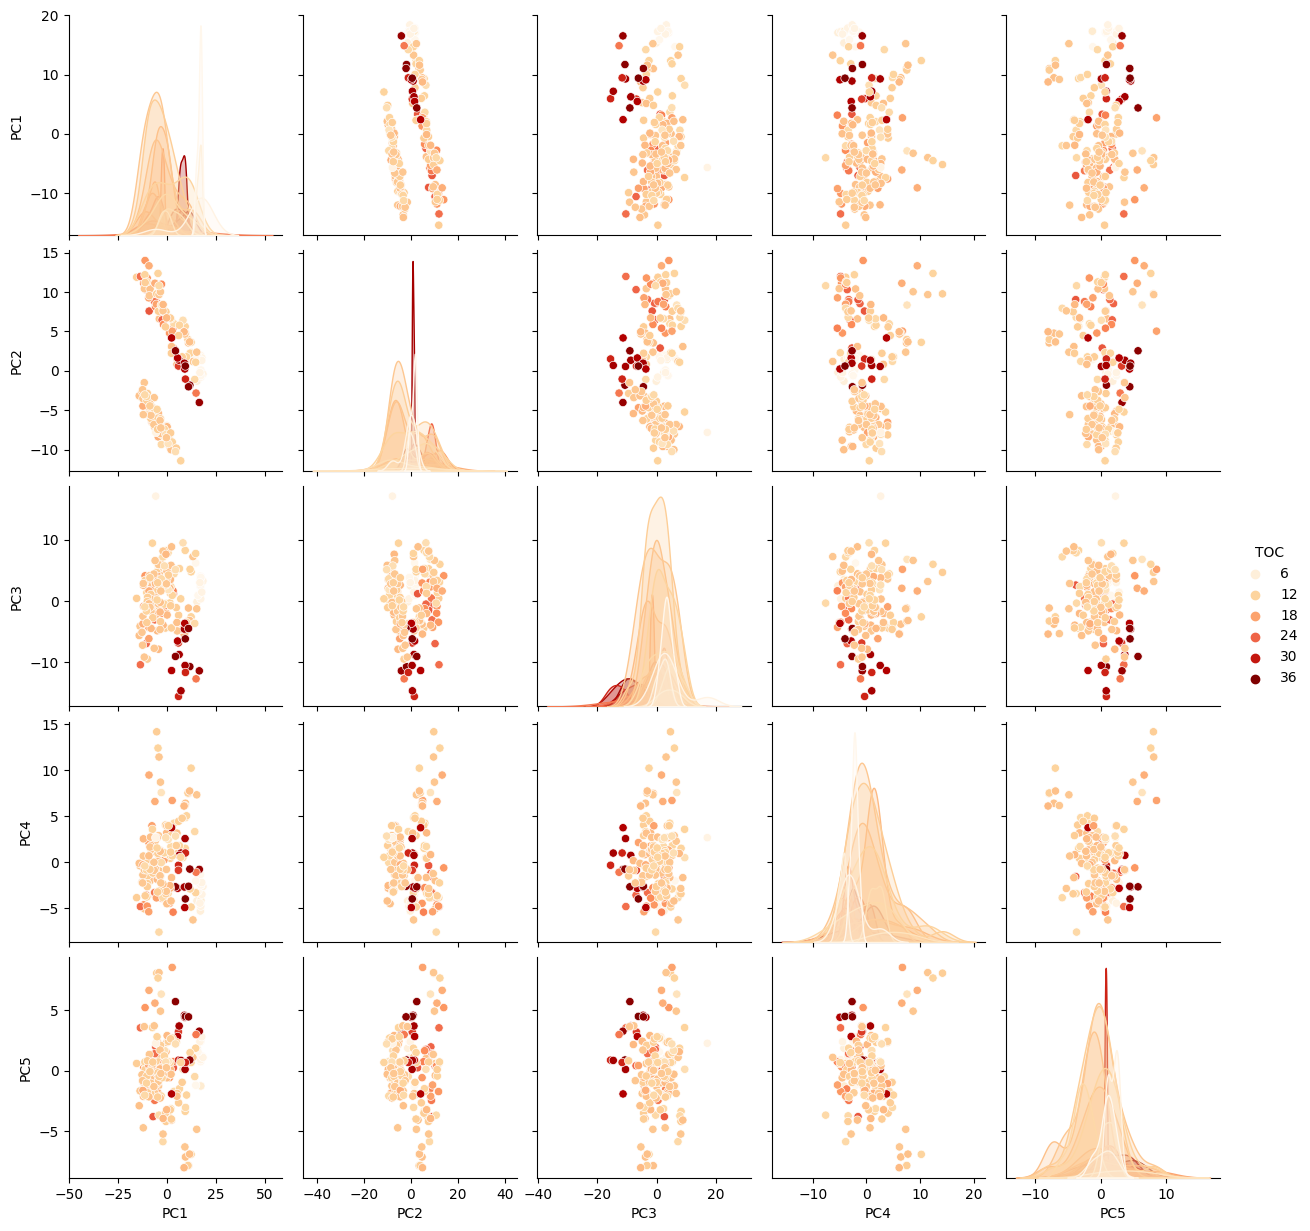

In [6]:
df["TOC"] = y_toc.T.astype("int")

sns.pairplot(df, hue='TOC', palette='OrRd')
plt.show()